In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import gsw

In [2]:
bathmat = scipy.io.loadmat('../../data/Rockall_bathymetry/Rockall_swath.mat')

In [3]:
lon = bathmat["gsi"][0][0][0].squeeze()
lat = bathmat["gsi"][0][0][1].squeeze()

ii = (-12.5 < lon) & (lon < -11.4)
jj = (54.1 < lat) & (lat < 54.4)
ij = ii[:, np.newaxis] * jj[np.newaxis, :]

lon = lon[ii]
lat = lat[jj]
dep = bathmat["gsi"][0][0][2][ij].reshape(lon.size, lat.size).transpose()

<ipython-input-4-8a0844e46007>:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(lon, lat, dep)
<ipython-input-4-8a0844e46007>:7: UserWarning: The following kwargs were not used by contour: 'linewidth'
  CS = plt.contour(lon, lat, dep, colors="k", levels=np.arange(-3000, 0, 250), linewidth=0.5, alpha=0.2, linestyles="solid")


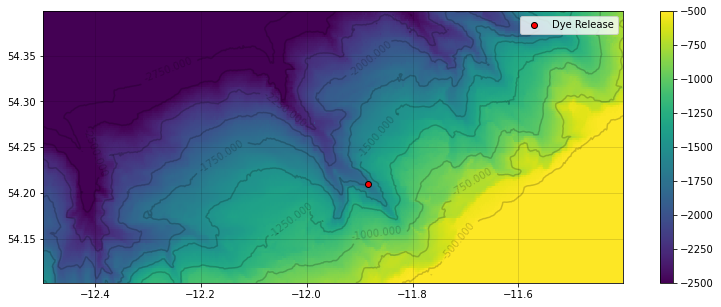

In [4]:
plt.figure(figsize=(13, 5))
dye_loc = [-11.885, 54.21]

plt.pcolor(lon, lat, dep)
plt.colorbar()
plt.clim(-2500, -500)
CS = plt.contour(lon, lat, dep, colors="k", levels=np.arange(-3000, 0, 250), linewidth=0.5, alpha=0.2, linestyles="solid")
plt.clabel(CS, CS.levels, inline=True, fontsize=10)
plt.plot(dye_loc[0], dye_loc[1], "ro", label="Dye Release", markeredgecolor="k")
plt.legend()
plt.grid(True, color="k", alpha=0.15)

In [5]:
pilot = scipy.io.loadmat('../../data/BLT_pilot/Rockall_RT_CTD_MHAproc.mat')

In [6]:
axis = pilot["CTD_all"][0][0]
var_names = str(pilot["CTD_all"][0][1].dtype)[3:-3].split("'), ('")
var_names = [var_name[:-5] for var_name in var_names]
axis = {var_names[i]: axis[0][0][i] for i in range(len(var_names))}

In [7]:
rim = pilot["CTD_all"][0][1]
var_names = str(pilot["CTD_all"][0][1].dtype)[3:-3].split("'), ('")
var_names = [var_name[:-5] for var_name in var_names]
rim = {var_names[i]: rim[0][0][i] for i in range(len(var_names))}

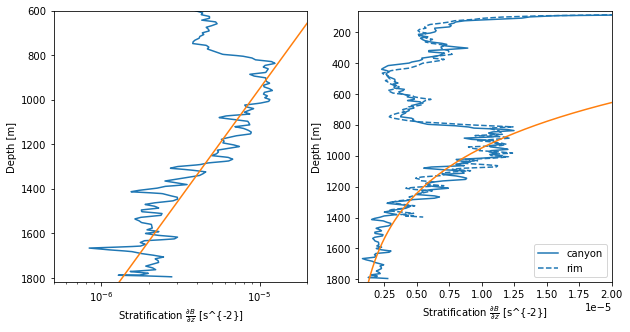

In [8]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
p = axis["p"].astype("float64")
plt.semilogx(axis["n2m"], p)
N20 = 1e-5
p0 = 950
N2smooth = N20*np.exp(-(p-p0)/425)
plt.semilogx(N2smooth, p)
plt.ylim(1820, 600)
plt.xlim(5e-7, 2e-5)
plt.ylabel("Depth [m]")
plt.xlabel(r"Stratification $\frac{\partial B}{\partial z}$ [s^{-2}]")


plt.subplot(1,2,2)
p = axis["p"].astype("float64")
plt.plot(axis["n2m"], p, label="canyon")
plt.plot(rim["n2m"], p, "C0--", label="rim")
plt.plot(N2smooth, p)
plt.ylim(1820, 60)
plt.xlim(5e-7, 2e-5)
plt.ylabel("Depth [m]")
plt.xlabel(r"Stratification $\frac{\partial B}{\partial z}$ [s^{-2}]")
plt.legend()

In [9]:
pmax = np.max(p)
dz = 2.
Z = np.arange(0.,  1000., dz)
N2smooth_interp = np.interp(Z, pmax-p[::-1,0], N2smooth[::-1,0])
N2smooth_interp[Z > (pmax-p0)] = 0.
N2smooth_interp[ N2smooth_interp==0. ] = np.max(N2smooth_interp)
bzsmooth_interp = N2smooth_interp - np.max(N2smooth_interp)

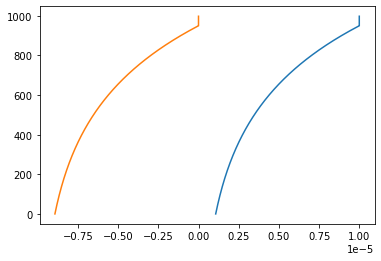

In [10]:
plt.plot(N2smooth_interp, Z)
plt.plot(bzsmooth_interp, Z)

In [11]:
ρ0 = 1000.
g = 9.81
α = 1e-4

In [12]:
B = np.cumsum(N2smooth_interp*dz)
b = np.cumsum(bzsmooth_interp*dz)

In [13]:
T0 = B/(g*α)
T = b/(g*α)
T -= T[-1]

Text(0.5, 0, 'Temperature [$^{\\circ}$C]')

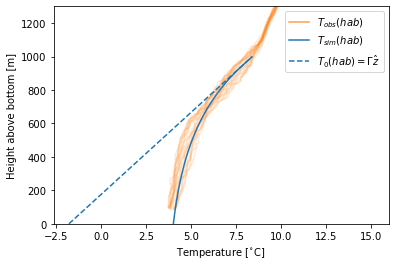

In [14]:
plt.plot(axis["t1"], pmax-p, "C1-", alpha=0.15)
plt.plot([], [], "C1", alpha=0.75, label=r"$T_{obs}(hab)$")
plt.plot(T0+4, Z, label=r"$T_{sim}(hab)$")
plt.plot(T0-T+4, Z, "C0--", label=r"$T_{0}(hab) = \Gamma \hat{z}$")
plt.ylim(0, 1300)
plt.legend()
plt.ylabel("Height above bottom [m]")
plt.xlabel(r"Temperature [$^{\circ}$C]")

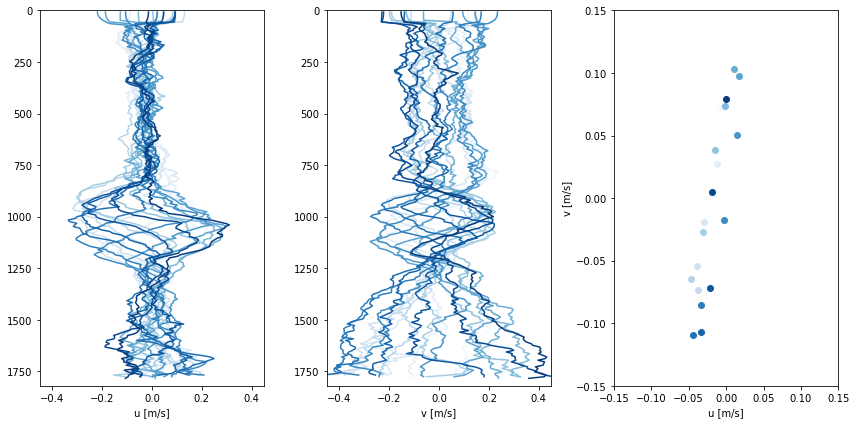

In [47]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
for n, t in enumerate(axis["yday"][0]):
    plt.plot(axis["u"][:, n], p, color=plt.get_cmap("Blues")(n/20))
plt.ylim(1820, 0)
plt.xlabel("u [m/s]")
plt.xlim(-0.45, 0.45)

plt.subplot(1,3,2)
for n, t in enumerate(axis["yday"][0]):
    plt.plot(axis["v"][:, n], p, color=plt.get_cmap("Blues")(n/20))
plt.ylim(1820, 0)
plt.xlim(-0.45, 0.45)
plt.xlabel("v [m/s]")

plt.subplot(1,3,3)
for n, t in enumerate(axis["yday"][0]):
    plt.plot(np.nanmean(axis["u"][:, n]), np.nanmean(axis["v"][:, n]), "o", color=plt.get_cmap("Blues")(n/20))
plt.xlim(-0.15, 0.15)
plt.ylim(-0.15, 0.15)
plt.xlabel("u [m/s]")
plt.ylabel("v [m/s]")
plt.tight_layout()

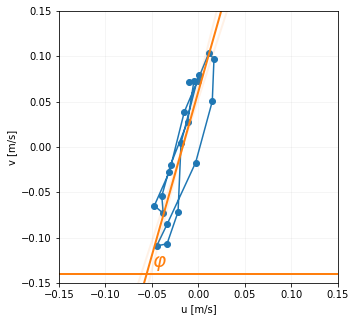

In [112]:
plt.figure(figsize=(5,5))
U = np.nanmean(axis["u"][:, :], axis=0)
V = np.nanmean(axis["v"][:, :], axis=0)
plt.plot(U, V, "o-")
plt.xlim(-0.15, 0.15)
plt.ylim(-0.15, 0.15)
plt.xlabel("u [m/s]")
plt.ylabel("v [m/s]")

a1, b1 = np.polyfit(U, V, deg=1)
x = np.arange(-0.15, 0.5, 0.01)
a2, b2 = np.polyfit(V, U, deg=1)
y = np.copy(x)
plt.plot(x, a1*x+b1, "C1-", lw=2, alpha=0.1)
plt.plot(a2*y+b2, y, "C1-", lw=2, alpha=0.1)

a = np.mean([a1, 1/a2])
b = np.mean([b1, -b2/a2])
plt.plot(x, a*x+b, "C1-", lw=2)
ϕ2 = np.arctan(a)

plt.plot(x, 0.*x-0.14, "C1-", lw=2)
plt.annotate(text=r"$\varphi$", xy=(-0.05, -0.132), color="C1", fontsize=20)
plt.grid(True, alpha=0.15)

<ipython-input-105-3e50236e1e7f>:1: RuntimeWarning: Mean of empty slice
  plt.semilogx(np.nanmean(axis["k"], axis=1), np.max(axis["p"][~np.isnan(np.nanmean(axis["k"], axis=1))])-axis["p"], label="axis")
<ipython-input-105-3e50236e1e7f>:2: RuntimeWarning: Mean of empty slice
  plt.semilogx(np.nanmean(rim["k"], axis=1), np.max(rim["p"][~np.isnan(np.nanmean(rim["k"], axis=1))])-rim["p"], label="rim")


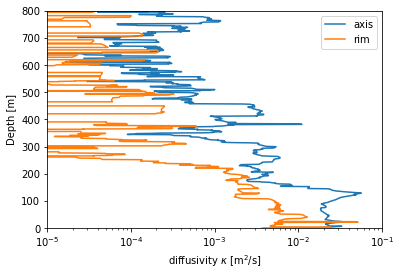

In [105]:
plt.semilogx(np.nanmean(axis["k"], axis=1), np.max(axis["p"][~np.isnan(np.nanmean(axis["k"], axis=1))])-axis["p"], label="axis")
plt.semilogx(np.nanmean(rim["k"], axis=1), np.max(rim["p"][~np.isnan(np.nanmean(rim["k"], axis=1))])-rim["p"], label="rim")
plt.ylim(0, 800)
plt.xlim(1e-5, 1e-1)
plt.ylabel("Depth [m]")
plt.xlabel(r"diffusivity $\kappa$ [m$^{2}$/s]")
plt.legend()

In [494]:
np.max(rim["p"])-rim["p"]

array([[1899],
       [1898],
       [1897],
       ...,
       [   2],
       [   1],
       [   0]], dtype=uint16)

<ipython-input-188-f7a687a4ea1d>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(lon, lat, dep)
<ipython-input-188-f7a687a4ea1d>:6: UserWarning: The following kwargs were not used by contour: 'linewidth'
  CS = plt.contour(lon, lat, dep, colors="k", levels=np.arange(-3000, 0, 250), linewidth=0.5, alpha=0.2, linestyles="solid")


(54.15, 54.3)

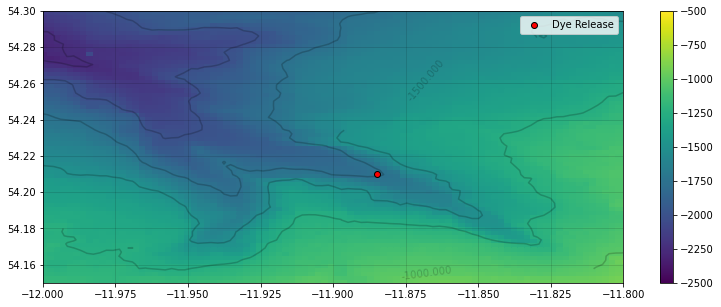

In [188]:
plt.figure(figsize=(13, 5))

plt.pcolor(lon, lat, dep)
plt.colorbar()
plt.clim(-2500, -500)
CS = plt.contour(lon, lat, dep, colors="k", levels=np.arange(-3000, 0, 250), linewidth=0.5, alpha=0.2, linestyles="solid")
plt.clabel(CS, CS.levels, inline=True, fontsize=10)
plt.plot(dye_loc[0], dye_loc[1], "ro", label="Dye Release", markeredgecolor="k")
plt.legend()
plt.grid(True, color="k", alpha=0.15)

plt.xlim([-12, -11.8])
plt.ylim([54.15, 54.3])